# Base and Wind Excitation

Simulations of a parcel undergoing base and wind excitation demonstrate the necessity of a stabiliziling control system.

## Base Excitation

The equation of motion for a simple pendulum undergoing horizontal base excitation described by $x(t) = A cos \omega t$ is:

$$\ddot{\theta} + \frac{g}{L} sin \theta - \frac{A}{L} \omega ^2 cos \theta cos \omega t= 0 $$

where $A$ is the base oscillation amplitude and $\omega$ is its frequency.

Assuming small angles $\theta$ such that $sin \theta \approx \theta$ and $ cos \theta \approx 1$, the equation is:

$$ \ddot{\theta} + \frac{g}{L} \theta - \frac{A}{L} \omega ^2 cos(\omega t) = 0$$

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy.integrate import odeint

In [12]:
g = 9.81 # gravity in m/s2
L = 6    # pendulum length in m
m = 1    # kg
A = 0.5 # m
w = 1 # rad/s

def base_excitation(X, t, g, L, A, w):
    x1 = X[0]
    x2 = X[1]

    return np.array([x2,
                     (-g/L) * x1 + (A/L) * w**2 * np.cos(w * t)])

In [13]:
x0 = np.array([0, 0])
t = np.linspace(0, 50, 10000)

out = odeint(base_excitation, x0, t, args=(g, L, A, w))
print(out)

[[0.00000000e+00 0.00000000e+00]
 [1.04184949e-06 4.16699959e-04]
 [4.16733575e-06 8.33372984e-04]
 ...
 [6.54651490e-02 1.84393502e-01]
 [6.63868672e-02 1.84255780e-01]
 [6.73078794e-02 1.84111082e-01]]


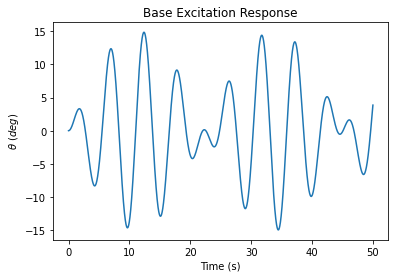

In [14]:
plot(t, (180/np.pi) * out[:, 0])
plt.title("Base Excitation Response")
plt.ylabel(r"$\theta$ ($deg$)")
plt.xlabel("Time (s)")

plt.savefig("./Graphics/baseexcitation")


## Wind Excitation

The motion of a pendulum undergoing excitation by wind is described by the equation

$$ g + L csc \theta(t) \ddot{\theta}(t) = \frac{Ac \rho cot \theta (t) (v - L cos\theta(t)\dot{\theta}(t))}{2m} $$

## Base and Wind Excitation

To model more realistic operating conditions, a pendulum operating with a combination of base and wind excitation is shown here. The solution is calculated by simply taking the sum of the discrete factors contributing to the response (the base and wind excitation responses) according to the superposition principle.